In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import random
from scipy.stats import norm
import concurrent.futures
from utilities import *
import matplotlib.pyplot as plt

# Question 1

In [2]:
# init parameters, same for question 1 and 2
m = 2000
d = 2000
s = d/100
beta = 2
iterations = 100*d

## Hyperparameter tuning

In [102]:
class NoiseComputer: 
    def __init__(self, X, y, theta): 
        self.X = X
        self.y = y
        self.theta = theta
        self.residual = y - X @ theta
    
    def compute_noise(self, new_theta, previous_theta, residual): 

        # element that became 0 will have -1 the one that became one will have +1 
        difference =  previous_theta - new_theta
        indices = np.nonzero(difference)

        column0 = self.X[:, indices[0]]  * difference[indices[0]][0]
        residual +=  np.squeeze(column0) 

        return residual

    def update_theta(self, new_theta): 
        self.theta = new_theta

def noise(X, y, theta): 
    # take the mean so the loss is indipendent from m
    return ((y - X @ theta) ** 2).sum()#.mean()


In [106]:

X, y, theta_true, theta = generate_data(m, d)
noise_comp = NoiseComputer(X, y, theta)

residual = noise_comp.residual

for i in range(10): 
    pos = np.random.randint(0, d) 
    theta1 = theta.copy()
    theta1[pos] = not theta[pos]  # get new theta with only one digit changed

    new_residual = noise_comp.compute_noise( theta1, theta, residual)
    print((new_residual**2).sum())
    print(noise(X, y, theta1))
    print()
    
    if i % 3 == 0: 
        residual = new_residual
        theta = theta1.copy()
        noise_comp.update_theta(theta)
    # print(theta.shape)

2094623.5038243588
2094623.5038243588

2089756.3431836409
2089756.3431836409

2095648.6882799887
2100530.2531884657

2093878.0746478015
2092977.5298848255

2087817.8684165569
2086955.593906631

2086725.3981180904
2092190.5800575225

2083734.3098462946
2090113.3601715888

2083753.8660246306
2090296.715727359

2083911.5096153594
2090387.8211871753

2086936.4120500316
2093246.4212291373



In [23]:
# try different beta in order 15 simulations for each, print final loss and number of iterations
repeat_experiment_n = 15
print('beta = 1', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1, m, d)) 
print('beta = 5', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 5, m, d))
print('beta = 10', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 10, m, d))
print('beta = 20', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 20, m, d))
print('beta = 20', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 50, m, d))
print('beta = 100', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 100, m, d))
print('beta = 1000', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1000, m, d))
print('beta = 1e4', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1e4, m, d))
print('beta = 5e4', run_multiple_experiments(repeat_experiment_n, get_sampling_losses, iterations, 1e5, m, d))

beta = 1 (0.6749333333333333, 200000.0)
beta = 10 (0.02673333333333334, 200000.0)
beta = 10 (0.0, 25669.0)
beta = 20 (0.0, 26111.133333333335)
beta = 20 (0.0, 30026.4)
beta = 100 (0.0, 28590.0)


/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:90: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


beta = 1000 (0.0, 27492.8)
beta = 1e4 (0.0, 29635.733333333334)
beta = 5e4 (0.0, 28742.8)


In [20]:
# very wide space to search on

best_mse = math.inf
best_n_iterations = math.inf
best_params = None

repeat_experiment_n = 1
for beta_start in [100, 500, 1000]: 
    for increse_every in [10, 100, 1000, 2000]: 
        for multiplicative_increase in [1.001, 1.01, 1.1, 1.2]:
            mse, required_iterations = run_multiple_experiments(repeat_experiment_n, get_simulation_annealing_losses, iterations, beta_start, m, d, increse_every, lambda x : x * multiplicative_increase)
            if mse <= best_mse and required_iterations <= best_n_iterations: 
                best_mse = mse
                best_n_iterations = required_iterations
                best_params_and_scores = {'beta_start': beta_start, 'increase_every': increse_every, 'multiplicative_increase' : multiplicative_increase}

print(best_mse, best_n_iterations)
print(best_params_and_scores)

/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:120: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


KeyboardInterrupt: 

/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:90: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


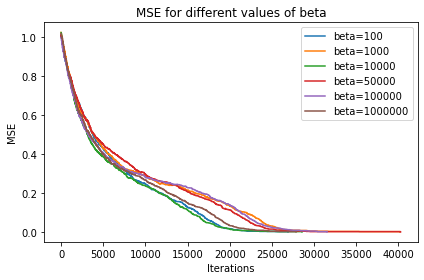

In [61]:

# for different values of beta computes the losses of the samples as we moove through the chain

plt.plot(get_sampling_losses(iterations, 100, m, d), label = 'beta=100')
plt.plot(get_sampling_losses(iterations, 1000, m, d), label = 'beta=1000')
plt.plot(get_sampling_losses(iterations, 10000, m, d), label = 'beta=10000')
plt.plot(get_sampling_losses(iterations, 50000, m, d), label = 'beta=50000')
plt.plot(get_sampling_losses(iterations, 100000, m, d), label = 'beta=100000')
plt.plot(get_sampling_losses(iterations, 1000000, m, d), label = 'beta=1000000')


plt.legend()
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE for different values of beta')
plt.tight_layout()

plt.savefig('MSE_diferent_beta.jpg')
plt.show()

/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:120: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))
/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:120: RuntimeWarning: overflow encountered in double_scalars
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))


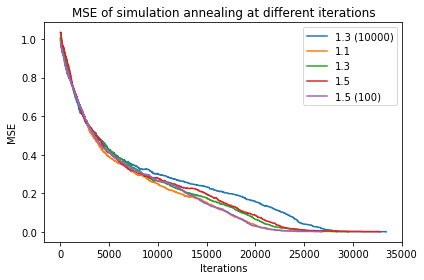

In [66]:
# different strategies of simulation annealing (linear, geometric..)
# test simulation annealing
plt.plot(get_simulation_annealing_losses(iterations, 10000, m, d, math.floor(iterations/20), lambda x : x * 1.1), label='1.3 (10000)')
plt.plot(get_simulation_annealing_losses(iterations, 1000, m, d, math.floor(iterations/20), lambda x : x * 1.1), label='1.1')
plt.plot(get_simulation_annealing_losses(iterations, 1000, m, d, math.floor(iterations/20), lambda x : x * 1.3), label='1.3')
plt.plot(get_simulation_annealing_losses(iterations, 1000, m, d, math.floor(iterations/20), lambda x : x * 1.5), label='1.5')
plt.plot(get_simulation_annealing_losses(iterations, 100, m, d, math.floor(iterations/20), lambda x : x * 1.5), label='1.5 (100)')

plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.title('MSE of simulation annealing at different iterations')
plt.tight_layout()
plt.legend()

plt.savefig('MSE_simulation_annealing.jpg')

In [74]:
# TODO rerurn with full iterations
# don't rerun as it will take a while

# increase the number of samples (m) to find minimum number of samples to 
losses_with_different_m = []
m_values = np.arange(250,2000, 250)

for m_value in  m_values: 
    # for the different values of m only save the last loss (after doing all the iterations)
    print(f'running MC for m={m_value}', end='\r')
    mse, n_iterations = run_multiple_experiments(15, get_sampling_losses, iterations, 10000, m_value, d)
    print(n_iterations)
    losses_with_different_m.append(mse)


plt.plot(m_values, losses_with_different_m) # always changes
plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m/d)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q1_ex6_minimum_m_to_recover.jpg')


/home/stefano/Documents/EPFL/MC/MC-project/utilities.py:90: RuntimeWarning: overflow encountered in exp
  comp = np.exp(-beta * (noise(X, y, theta1) - noise(X, y, theta)))
/home/stefano/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/stefano/.local/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
nanning MC for m=500


KeyboardInterrupt: 

# Qeustions 2 

In [22]:
plt.plot(get_sampling_losses_fixed_ones(iterations, 1, 100, d, s))
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.tight_layout()

plt.savefig('MSE_fixed_ones.jpg')

KeyboardInterrupt: 

In [5]:
# run multiple times and take the average

losses_with_different_m1 = []
m_values = np.arange(10, 250, 10)
for m_value in  m_values: 
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m1.append(get_sampling_losses_fixed_ones(iterations, 0.1, m_value, d, s)[-1])

plt.plot(m_values , losses_with_different_m1) 

plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m/d)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q2_ex6_minimum_m_to_recover.jpg')

KeyboardInterrupt: 

# Question 3

/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:17: RuntimeWarning: divide by zero encountered in log
  return -(np.log(alpha[ones_indices]).sum() + np.log(1 - alpha[min_one_indices]).sum())
/var/folders/pw/_lszqphd0sj2lsl8tyw057lc0000gn/T/ipykernel_63723/500220195.py:44: RuntimeWarning: invalid value encountered in scalar subtract
  comp = np.exp(-beta * (log_likelihood(X, y, theta1) - log_likelihood(X, y, theta)))


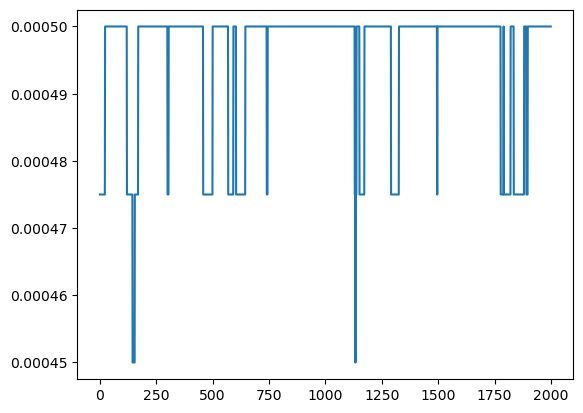

In [166]:
m3 = 100
d3 = 500
s3 = d3/100
#beta = 2
iterations3 = 100*d3

loss = get_sampling_losses_sign(iterations3, 1, m3, d3, s3)
plt.plot(loss)

In [ ]:
losses_with_different_m1 = []
m_values = np.arange(1, 120, 10)
for m_value in m_values: 
    print(f'running MC for m={m_value}', end='\r')
    losses_with_different_m1.append(get_sampling_losses_sign(iterations, 5, m_value, d, s)[-1])

plt.plot(m_values, losses_with_different_m1) 

plt.ylabel('MSE')
plt.xlabel('Number of samples over dimensions (m)')
plt.title('MSE with different number of samples m')
plt.tight_layout()

plt.savefig('q3_ex3_minimum_m_to_recover.jpg')